<a href="https://colab.research.google.com/github/theofansapulete/SLR-NLR/blob/main/SLR_NLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SLR

In [ ]:
#import dimulaiiiii
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#ambil data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-06-11 01:52:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-06-11 01:52:03 (1.95 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
#bikin dataframe
data = pd.read_csv('FuelConsumption.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
dataku = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dataku

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


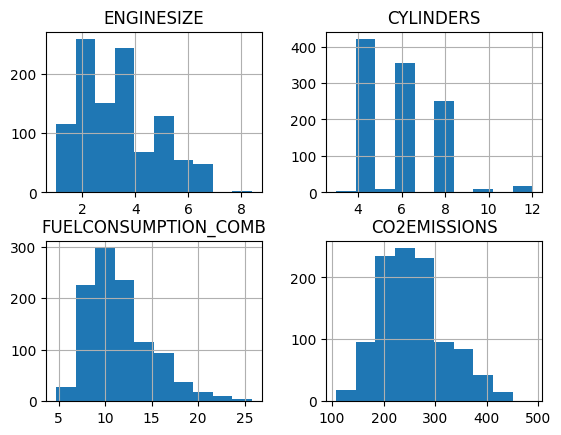

In [ ]:
#silakan bikin visualisasi utk lihat fitur/kolom
vis = dataku[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
vis.hist()
plt.show()

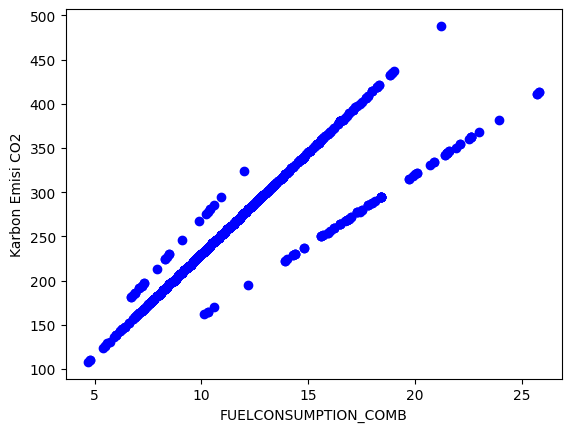

In [ ]:
#kita harus cek korelasi/hubungan dua variabel/fitur/kolom
plt.scatter(dataku.FUELCONSUMPTION_COMB, dataku.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Karbon Emisi CO2")
plt.show()

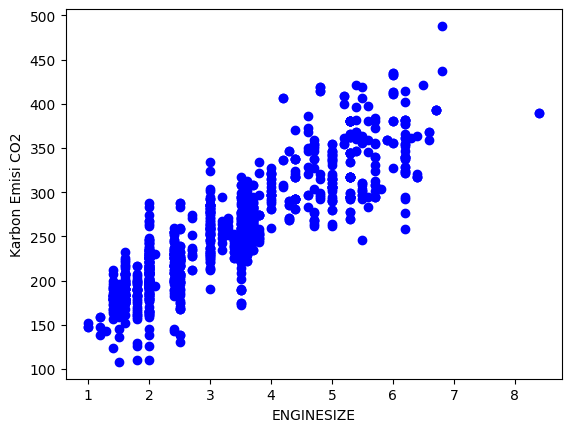

In [ ]:
plt.scatter(dataku.ENGINESIZE, dataku.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Karbon Emisi CO2")
plt.show()

In [ ]:
#TUGASSSSSSSS


#Coba bandingkan Cylinder dengan Emisi CO2


In [ ]:
#Train-Test
maskuh = np.random.rand(len(data)) < 0.8
train = dataku[maskuh]
test = dataku[~maskuh]

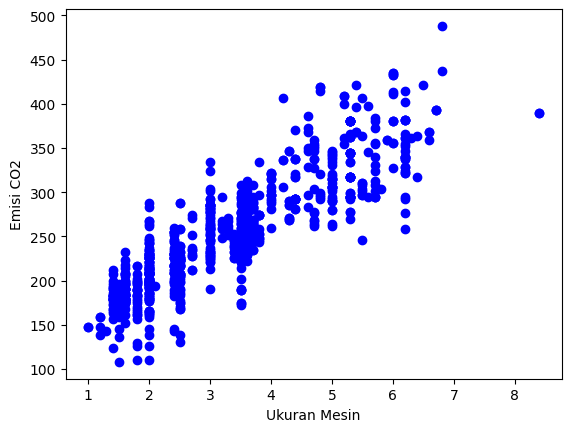

In [ ]:
#lihat distribusi data train
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Ukuran Mesin")
plt.ylabel("Emisi CO2")
plt.show()

In [ ]:
#panggil regresi! artinya kita ngitung a dan b
from sklearn import linear_model
regresi = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regresi.fit(train_x, train_y)

#hitung nilai variabel a dan b
print('Nilai b atau Koefisien: ', regresi.coef_)
print('Nilai a atau Intersep: ', regresi.intercept_)

Nilai b atau Koefisien:  [[39.18243207]]
Nilai a atau Intersep:  [124.35240987]


Text(0, 0.5, 'Emisi CO2')

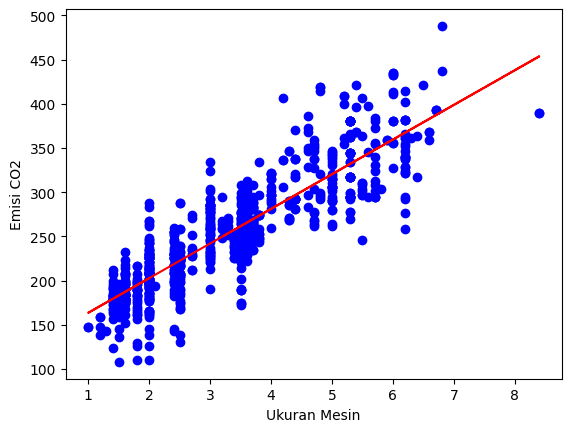

In [ ]:
#Bikin garis persamaan linear-nya
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regresi.coef_[0][0]*train_x + regresi.intercept_[0], '-r')
plt.xlabel("Ukuran Mesin")
plt.ylabel("Emisi CO2")

In [ ]:
#Evaluasi
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regresi.predict(test_x)

print('Nilai MSE-nya: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Nilai R2-score-nya: %.2f' % r2_score(test_y_, test_y))

Nilai MSE-nya: 23.36
Nilai R2-score-nya: 0.70


NLR

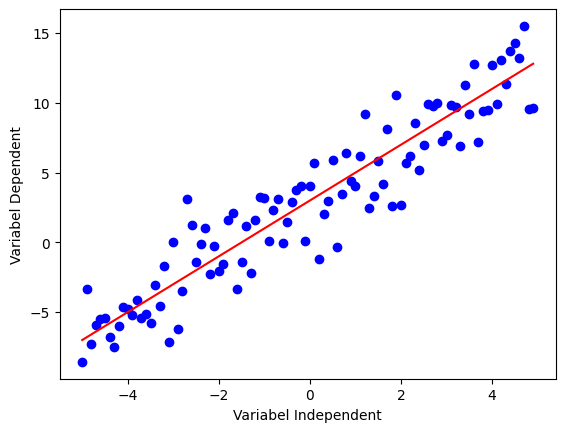

In [ ]:
#buat contoh perbandingan random utk SLR
x = np.arange(-5.0,5.0,0.1)

#ingat persamaan Y = a(X)+b
y = 2*x + 3
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise

#tampilin gambarnya
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Variabel Dependent')
plt.xlabel('Variabel Independent')
plt.show()

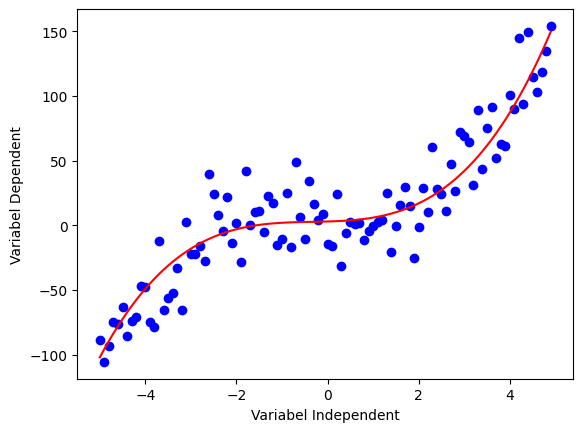

In [ ]:
#buat contoh perbandingan random utk kubik
x = np.arange(-5.0,5.0,0.1)

#ingat persamaan kubik, kalo gak ingat gugling!
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

#tampilin gambarnya
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Variabel Dependent')
plt.xlabel('Variabel Independent')
plt.show()

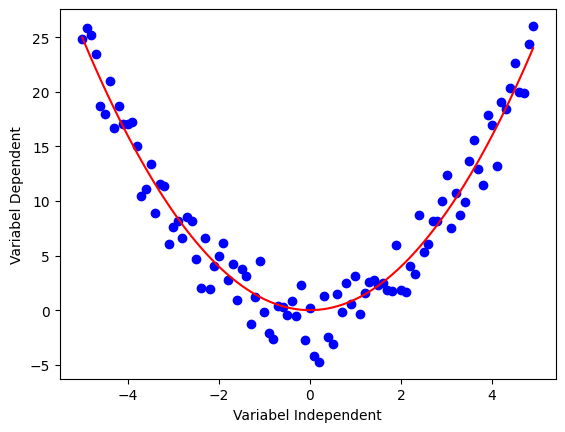

In [ ]:
#buat contoh perbandingan Y = X kuadrat
x = np.arange(-5.0,5.0,0.1)

#ingat persamaan quadratic, kalo gak ingat gugling!
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

#tampilin gambarnya
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Variabel Dependent')
plt.xlabel('Variabel Independent')
plt.show()

$$ Y = a+bc^x $$

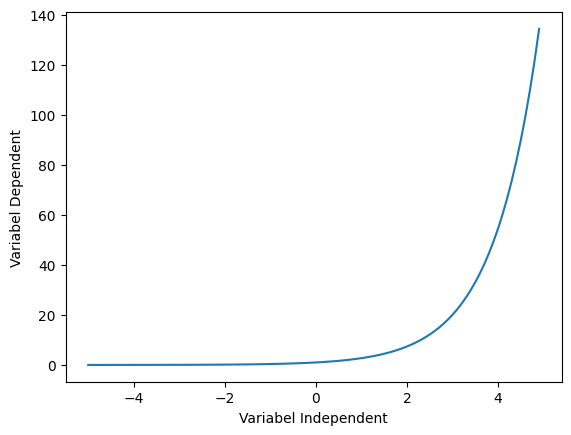

In [ ]:
#buat contoh perbandingan Y = a + bc^x
x = np.arange(-5.0,5.0,0.1)

#ingat persamaan exponensial, kalo gak ingat gugling!
y = np.exp(x)

#tampilin gambarnya
plt.plot(x, y)
plt.ylabel('Variabel Dependent')
plt.xlabel('Variabel Independent')
plt.show()

Rumusnya Sigmoid
$$ Y = a + \frac{b}{1+c^{(X-d)}} $$

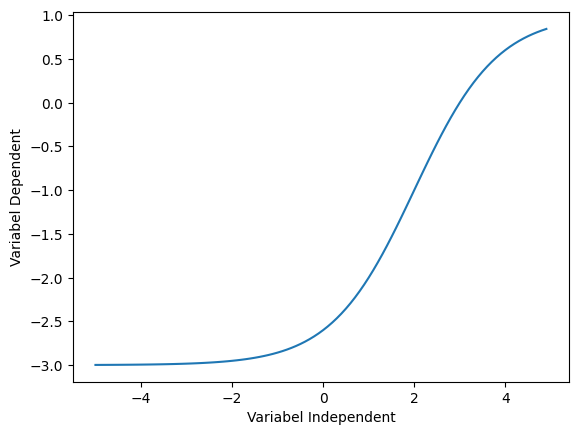

In [ ]:
x = np.arange(-5.0,5.0,0.1)

#ingat persamaan sigmoid, kalo gak ingat gugling!
y = 1-4/(1+np.power(3, x-2))

#tampilin gambarnya
plt.plot(x, y)
plt.ylabel('Variabel Dependent')
plt.xlabel('Variabel Independent')
plt.show()

In [ ]:
#lihat China punya pendapatan per kapita!
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2024-06-11 02:00:36 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [ ]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


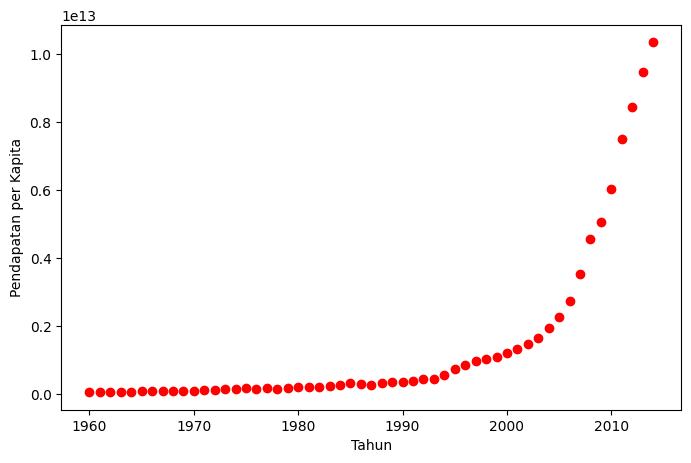

In [ ]:
#tampilin ke grafik
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Pendapatan per Kapita')
plt.xlabel('Tahun')
plt.show()

In [ ]:
#TUGASSSSSSSS


#Coba bikin garis persamaan untuk sigmoid dengan dataset china_gdp ini

In [ ]:
#TUGASSSSSSSS


#Coba bikin perhitungan akurasi dari modelnya